# Obtenção dos Dados

Os dados obtidos foram extraídos de 10 temporadas (2021 -2012) de 6 principais ligas de futebol, sendo elas: Budesliga, La Liga, Le Championnat, Premier League, Serie A e Brasileirão serie A. 

> Extraídos a partir da fonte: https://www.football-data.co.uk/data.php

## Imports

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import functools
from fancyimpute import KNN
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from collections import Counter
from sklearn.covariance import EllipticEnvelope

In [17]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

# 1. Coletar Dados

## Leitura dos Dados

In [18]:
path_data ='./data'

In [19]:
path_leagues = os.listdir(path_data)

In [20]:
path_leagues.remove('README.md')

Lendo os arquivos

In [21]:
dfs = []
for league in path_leagues: 
    for name in os.listdir(f'./data/{league}'):
        df_t = pd.read_csv(f'./data/{league}/' + name)
        if (league != 'Brasileirao'):
            # o dataset do brasileirão já tem a Season preenchida
            df_t['Season'] = name.split("_")[0][-4:]
        dfs.append(df_t)
df = pd.concat(dfs).reset_index(drop=True)

* Quantidade de Registros e Variáveis

In [22]:
df.shape

(22156, 144)

* Describe

In [23]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,LBH,LBD,LBA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,PH,PD,PA,SBH,SBD,SBA
count,22148.000000,22148.000000,18156.000000,18156.000000,18157.000000,18157.000000,18157.000000,18157.000000,18155.000000,18155.000000,18157.000000,18157.000000,18156.000000,18157.000000,18157.000000,18157.000000,18154.000000,18154.000000,18154.000000,18151.000000,18151.000000,18151.000000,18132.000000,18132.000000,18132.000000,17752.000000,17752.000000,17752.000000,18151.000000,18151.000000,18151.000000,18152.000000,18152.000000,18152.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,5368.000000,5368.000000,5357.000000,5357.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5361.000000,5361.000000,5369.000000,5369.000000,5375.000000,5375.000000,5375.000000,5375.000000,5376.000000,5376.000000,5376.000000,5377.000000,5377.000000,5377.000000,5349.000000,5349.000000,5349.000000,17775.000000,17775.000000,17775.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.00000,5377.000000,5376.000000,5376.000000,5367.000000,5367.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,5375.000000,5375.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000,10950.000000,10950.000000,10950.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12743.000000,12743.000000,12743.000000,12743.000000,12743.000000,12743.000000,4194.000000,4194.000000,4194.000000,2197.000000,2197.000000,2197.000000,2206.000000,2206.000000,2206.000000,3989.000000,3989.000000,3989.000000,380.000000,380.000000,380.000000
mean,1.518602,1.160150,0.680326,0.530844,13.601806,11.084100,4.925649,4.017734,12.925475,13.230129,5.564025,4.483946,1.908460,2.146445,0.091700,0.121220,2.772418,4.039061,4.699059,2.736915,3.985013,4.557633,2.676530,3.887905,4.341667,2.874412,4.200232,4.977298,2.770284,3.870886,4.685381,2.826178,4.084213,4.932986,2.763465,4.071248,4.872860,2.586817,3.811897,4.337376,1.862915,2.098608,1.903937,2.146933,1.938089,2.199313,1.861267,2.098923,-0.260837,1.956614,1.954589,1.966523,1.957104,1.995777,1.990940,1.937397,1.932396,2.853400,4.088597,4.342980,2.860104,4.053273,4.337551,2.852367,3.970443,4.217880,2.899301,4.226362,5.052740,2.912327,3.992912,4.482883,2.915667,4.068942,4.473846,3.153273,4.363744,4.959764,2.894826,4.07538,4.402907,1.874621,2.108088,1.916506,2.158219,1.962364,2.258717,1.868410,2.111326,-0.253627,1.946895,1.961233,1.958114,1.968637,2.014534,2.028769,1.931294,1.943325,2.664749,3.914570,4.737341,41.823267,2.941594,2.721310,4.306893,3.981791,5.540487,4.794751,36.804100,1.993754,1.905482,2.118752,2.007113,22.968846,-0.357196,2.003053,1.942253,1.993006,1.932273,2.556106,3.805156,4.629891,2.469235,3.716846,4.399554,2.456274,3.699556,4.375861,2.304144,3.654558,4.709747,2.287950,3.354418,4.111145
std,1.281299,1.138032,0.833035,0.739406,5.217906,4.608204,2.685153,2.376195,4.219755,4.301761,2.972341,2.607763,1.344365,1.375349,0.306204,0.349061,2.038561,1.381925,4.080271,1.931442,1.306242,3.832102,1.776954,1.113265,3.443353,2.211436,1.580827,4.551427,2.002557,1.215903,4.199379,2.170874,1.483693,4.780369,1.866234,1.164565,3.859928,1.598765,1.013781,3.0286

In [24]:
df.describe(include='object')

,Div,Date,Time,HomeTeam,AwayTeam,FTR,HTR,Season,League,Referee
count,22149,22149,9367,22149,22149,22148,18156,22156,3990,3800
unique,6,2844,64,199,199,3,3,21,1,39
top,Brazil,22/12/2018,20:00,Atletico-MG,Flamengo RJ,H,D,2014,Serie A,M Oliver
freq,3990,37,1582,200,200,10084,7499,1829,3990,283


* IQR das variáveis numéricas

In [25]:
desc = df.describe()
# Q3 - Q1
(desc.loc['75%'] - desc.loc['25%']).to_frame().T

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,LBH,LBD,LBA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,PH,PD,PA,SBH,SBD,SBA
0,1.0,2.0,1.0,1.0,7.0,6.0,3.0,3.0,6.0,6.0,4.0,3.0,2.0,2.0,0.0,0.0,1.33,0.9,2.85,1.28,0.8,2.6,1.15,0.7,2.5,1.4,0.93,3.0125,1.3,0.8,2.55,1.3,0.9,2.95,1.27,0.86,3.08,1.18,0.75,2.62,0.49,0.58,0.49,0.6,0.48,0.6,0.46,0.56,1.0,0.14,0.15,0.15,0.15,0.15,0.15,0.15,0.14,1.59,0.93,2.8,1.55,1.03,2.75,1.55,0.9,2.7,1.44,0.97,3.13,1.58,0.9,3.0,1.55,1.03,3.0,1.76,1.1,3.22,1.57,0.98,2.85,0.49,0.58,0.5,0.61,0.54,0.66,0.48,0.58,1.0,0.16,0.15,0.15,0.17,0.16,0.17,0.16,0.15,1.13,0.75,2.5,9.0,1.3,1.2,0.92,0.79,3.14,2.72,8.0,0.5,0.45,0.51,0.46,6.0,1.0,0.22,0.21,0.22,0.2,1.08,0.55,2.4,0.95,0.6,2.35,0.92,0.5,2.38,0.92,0.6,2.78,0.873,0.3,2.3


# 2. Pré-Processamento dos Dados

### 2.0 Ajustando Formatação da Hora

In [26]:
df['Time'].value_counts()

20:00     1582
14:00      689
14:30      549
15:00      488
19:00      457
17:30      455
19:45      440
23:00      425
22:30      424
01:00      363
23:30      260
17:00      247
18:00      235
19:30      193
00:00      190
16:00      181
22:00      166
21:00      161
00:30      154
16:30      149
13:00      139
21:30      138
18:30      127
12:00      120
12:30      105
15:15      104
11:30       88
02:00       75
01:30       70
20:15       69
20:30       65
01:45       58
22:15       53
20:45       50
01:50       42
23:15       40
21:15       31
11:00       25
16:05       23
19:15       21
23:45       17
20:20       15
16:15       12
14:15        9
15:30        7
17:45        7
 00:30       5
23:50        5
19:20        5
14:05        5
13:30        5
00:45        4
20:05        3
18:45        3
18:15        3
 22:30       3
17:55        1
00:50        1
22:50        1
22:45        1
21:45        1
 23:00       1
 22:15       1
11:45        1
Name: Time, dtype: int64

In [27]:
df.loc[df['Time'] == ' 23:00', 'Time'] = '23:00'
df.loc[df['Time'] == ' 22:15', 'Time'] = '22:15'
df.loc[df['Time'] == ' 22:30', 'Time'] = '22:30'
df.loc[df['Time'] == ' 00:30', 'Time'] = '00:30'

In [28]:
df[df['Time'].isna()].shape

(12789, 144)

* Transformando a hora em segundos

In [29]:
df.loc[df['Time'].notna(), 'Time'] += ':00'

In [30]:
df['Time_seconds'] = pd.to_timedelta(df['Time']).dt.total_seconds()

In [31]:
df = df.drop('Time', axis=1)

### 2.1. Definição de Tipos

In [32]:
df.dtypes

Div              object
Date             object
HomeTeam         object
AwayTeam         object
FTHG            float64
FTAG            float64
FTR              object
HTHG            float64
HTAG            float64
HTR              object
HS              float64
AS              float64
HST             float64
AST             float64
HF              float64
AF              float64
HC              float64
AC              float64
HY              float64
AY              float64
HR              float64
AR              float64
B365H           float64
B365D           float64
B365A           float64
BWH             float64
BWD             float64
BWA             float64
IWH             float64
IWD             float64
IWA             float64
PSH             float64
PSD             float64
PSA             float64
WHH             float64
WHD             float64
WHA             float64
VCH             float64
VCD             float64
VCA             float64
MaxH            float64
MaxD            

In [33]:
df = df.astype({'Div': 'category',
           'HomeTeam': 'category',
           'AwayTeam': 'category',
           'FTR': 'category',
           'HTR': 'category',
           'League': 'category',
           'Referee': 'category',
           'Season': 'category',
           'FTHG': 'Int64',
           'FTAG': 'Int64',
           'HTHG': 'Int64',
           'HTAG': 'Int64',
           'HS': 'Int64',
           'AS': 'Int64',
           'HST': 'Int64',
           'AST': 'Int64',
           'HC': 'Int64',
           'AC': 'Int64',
           'HF': 'Int64',
           'AF': 'Int64',
           'HY': 'Int64',
           'AY': 'Int64',
           'HR': 'Int64',
           'AR': 'Int64'})

In [34]:
df.dtypes

Div             category
Date              object
HomeTeam        category
AwayTeam        category
FTHG               Int64
FTAG               Int64
FTR             category
HTHG               Int64
HTAG               Int64
HTR             category
HS                 Int64
AS                 Int64
HST                Int64
AST                Int64
HF                 Int64
AF                 Int64
HC                 Int64
AC                 Int64
HY                 Int64
AY                 Int64
HR                 Int64
AR                 Int64
B365H            float64
B365D            float64
B365A            float64
BWH              float64
BWD              float64
BWA              float64
IWH              float64
IWD              float64
IWA              float64
PSH              float64
PSD              float64
PSA              float64
WHH              float64
WHD              float64
WHA              float64
VCH              float64
VCD              float64
VCA              float64


* Atribuindo Tipo para a Data

In [35]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, dayfirst=True)

### 2.2. Tratamento de Dados Ausentes

* Verificando Taxa de Preenchimento das Colunas

In [36]:
(df.count() / df.shape[0] * 100).sort_values()

SBA               1.715111
SBD               1.715111
SBH               1.715111
GBH               9.916050
GBD               9.916050
GBA               9.916050
BSH               9.956671
BSA               9.956671
BSD               9.956671
Referee          17.151110
PH               18.004152
PD               18.004152
PA               18.004152
League           18.008666
SJA              18.929410
SJH              18.929410
SJD              18.929410
IWCD             24.142444
IWCH             24.142444
IWCA             24.142444
P<2.5            24.178552
P>2.5            24.178552
B365AHH          24.196606
B365AHA          24.196606
PC>2.5           24.223687
PC<2.5           24.223687
B365<2.5         24.228200
B365>2.5         24.228200
PAHA             24.232713
PAHH             24.232713
MaxAHH           24.259794
Max>2.5          24.259794
Avg<2.5          24.259794
MaxAHA           24.259794
AHh              24.259794
AvgAHH           24.259794
Avg>2.5          24.259794
M

In [37]:
df[df['FTR'].isna()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season,LBH,LBD,LBA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,League,PH,PD,PA,Referee,SBH,SBD,SBA,Time_seconds
5691,Brazil,2016-12-11,Chapecoense-SC,Atletico-MG,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.85,3.3,2.68,2.85,3.3,2.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Serie A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68400.0
14650,NaN,NaT,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15031,NaN,NaT,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15792,NaN,NaT,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16553,NaN,NaT,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16554,NaN,NaT,NaN,NaN,<NA>,<NA>,NaN,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#### 2.2.1. Dropando Colunas com Taxa de Preenchimento <= 10%

In [38]:
df = df.dropna(thresh=0.1*df.shape[0], axis=1)

In [39]:
df.shape

(22156, 135)

#### 2.2.2. Dropando Colunas Específicas

> Drop em League pois já temos essa informação em Div e mais bem preenchida

In [40]:
df = df.drop("League", axis=1) 

#### 2.2.3. Removendo Instâncias com pelo menos um atributo vazio

> Definitivamente, não é uma boa ideia, nesse caso.

In [41]:
df.dropna().shape

(0, 134)

#### 2.2.4. Removendo Instâncias com todas as colunas vazias, com exceção da Season

> Season foi excluida dessa verificação pois é criada com base no nome do arquivo

In [42]:
cols = list(df.columns)
cols.remove('Season')
df = df.dropna(how='all', subset=cols)

In [43]:
df.shape

(22149, 134)

#### 2.2.5 Removendo Registros que não temos informações sobre o  jogo

In [44]:
df = df.dropna(axis=0, subset=['FTR'])

In [45]:
df.shape

(22148, 134)

* Verificando Novamente a Taxa de Preenchimento

In [46]:
(df.count() / df.shape[0] * 100).sort_values()

Referee          17.157305
PA               18.010656
PD               18.010656
PH               18.010656
SJA              18.936247
SJD              18.936247
SJH              18.936247
IWCD             24.151165
IWCH             24.151165
IWCA             24.151165
P>2.5            24.187286
P<2.5            24.187286
B365AHH          24.205346
B365AHA          24.205346
PC<2.5           24.232436
PC>2.5           24.232436
B365>2.5         24.236951
B365<2.5         24.236951
PAHA             24.241466
PAHH             24.241466
B365CAHH         24.268557
AvgAHA           24.268557
Max>2.5          24.268557
Max<2.5          24.268557
Avg>2.5          24.268557
Avg<2.5          24.268557
AHh              24.268557
AvgAHH           24.268557
MaxAHA           24.268557
MaxAHH           24.268557
B365CAHA         24.268557
B365C>2.5        24.273072
B365C<2.5        24.273072
B365CH           24.273072
B365CD           24.273072
B365CA           24.273072
BWCA             24.277587
B

#### 2.2.6. Imputação Dados

##### 2.2.6.1. Dados Numéricos

* Utilizando fancyimpute

In [47]:
df_knn = df.select_dtypes(include=[np.number])
df_knn.iloc[:, :] = KNN(k=5).fit_transform(df_knn)

Imputing row 1/22148 with 27 missing, elapsed time: 382.054
Imputing row 101/22148 with 27 missing, elapsed time: 385.838
Imputing row 201/22148 with 27 missing, elapsed time: 386.036
Imputing row 301/22148 with 27 missing, elapsed time: 386.193
Imputing row 401/22148 with 68 missing, elapsed time: 386.607
Imputing row 501/22148 with 68 missing, elapsed time: 387.338
Imputing row 601/22148 with 68 missing, elapsed time: 388.112
Imputing row 701/22148 with 68 missing, elapsed time: 388.833
Imputing row 801/22148 with 68 missing, elapsed time: 389.560
Imputing row 901/22148 with 68 missing, elapsed time: 390.312
Imputing row 1001/22148 with 68 missing, elapsed time: 391.030
Imputing row 1101/22148 with 68 missing, elapsed time: 391.795
Imputing row 1201/22148 with 68 missing, elapsed time: 392.520
Imputing row 1301/22148 with 68 missing, elapsed time: 393.252
Imputing row 1401/22148 with 68 missing, elapsed time: 394.041
Imputing row 1501/22148 with 68 missing, elapsed time: 394.855
Impu

In [48]:
df_knn

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,LBH,LBD,LBA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,SJH,SJD,SJA,PH,PD,PA,Time_seconds
0,1.0,0.0,0.0,0.0,11.0,11.0,5.0,2.0,14.0,9.0,3.0,8.0,1.0,1.0,0.0,0.0,5.25,3.80,1.65,5.50,3.80,1.65,5.000000,3.800000,1.700000,5.15,3.84,1.74,5.00,3.8,1.70,5.00,3.80,1.75,5.500,3.950,1.760,5.070,3.810,1.710,1.800000,2.000000,1.810000,2.090000,1.850000,2.110000,1.790000,2.050000,0.750000,1.990000,1.940000,1.980000,1.940000,2.000000,1.950000,1.960000,1.920000,5.250000,3.800000,1.650000,4.750000,3.750000,1.750000,5.000000,3.800000,1.700000,5.34,3.62,1.78,5.000000,3.800000,1.700000,4.800000,3.800000,1.800000,5.800000,3.900000,1.810000,5.030000,3.660000,1.760000,1.900000,1.900000,1.980000,1.930000,1.990000,2.110000,1.860000,1.970000,0.750000,1.930000,2.000000,1.910000,2.010000,2.020000,2.030000,1.910000,1.980000,4.939887,3.833026,1.685106,43.735083,5.799287,5.304632,4.161158,3.883895,1.717050,1.667750,37.151973,1.872757,1.811457,2.160392,2.056724,24.994738,0.892209,1.911269,1.851307,2.075947,2.013270,4.829617,3.515323,1.751737,4.794954,3.580361,1.833683,72000.0
1,1.0,3.0,0.0,1.0,7.0,17.0,4.0,11.0,17.0,12.0,6.0,4.0,5.0,2.0,0.0,1.0,4.75,4.20,1.65,4.40,4.20,1.72,5.300000,4.200000,1.600000,4.73,4.18,1.72,5.25,4.2,1.60,4.75,4.20,1.73,5.300,4.400,1.730,4.670,4.120,1.690,1.530000,2.500000,1.520000,2.660000,1.530000,2.720000,1.490000,2.580000,0.750000,2.040000,1.890000,2.010000,1.910000,2.050000,1.910000,2.000000,1.880000,5.250000,4.200000,1.570000,4.500000,4.100000,1.700000,4.600000,3.800000,1.750000,5.10,4.46,1.65,5.000000,4.200000,1.630000,5.200000,4.400000,1.650000,6.000000,4.520000,1.750000,4.930000,4.260000,1.650000,1.440000,2.750000,1.490000,2.760000,1.510000,2.880000,1.470000,2.630000,1.000000,1.820000,1.970000,1.850000,2.070000,2.000000,2.200000,1.820000,2.060000,4.639817,3.870561,1.727905,40.470056,5.656949,5.222275,4.229035,3.903417,1.747347,1.693129,35.132115,1.774006,1.703060,2.336265,2.204470,20.878546,0.870424,1.939250,1.860154,2.087355,2.016978,4.595372,3.629944,1.804198,4.350000,3.400000,2.040000,57600.0
2,1.0,1.0,0.0,0.0,14.0,12.0,6.0,3.0,13.0,14.0,3.0,3.0,4.0,4.0,1.0,0.0,1.66,3.75,5.50,1.67,3.75,5.50,1.670000,3.750000,5.300000,1.68,3.94,5.47,1.67,3.8,5.25,1.67,3.90,5.75,1.720,3.980,5.750,1.680,3.800,5.290,2.000000,1.800000,2.080000,1.820000,2.140000,1.830000,2.070000,1.770000,-0.750000,1.910000,2.020000,1.910000,2.010000,1.930000,2.030000,1.890000,1.990000,1.660000,3.750000,5.500000,1.650000,3.800000,5.500000,1.670000,3.800000,5.300000,1.69,3.88,5.47,1.650000,3.900000,5.250000,1.700000,3.900000,5.500000,1.720000,3.950000,6.200000,1.680000,3.820000,5.370000,2.000000,1.800000,2.060000,1.850000,2.080000,1.980000,2.000000,1.820000,-0.750000,1.940000,1.990000,1.920000,2.000000,1.960000,2.120000,1.890000,2.000000,1.645768,3.880593,5.115167,35.848582,1.685355,1.628338,4.153368,3.894209,6.073655,5.498774,31.697124,1.860666,1.783850,2.151310,2.054620,22.401335,-0.963591,2.124074,2.070636,1.873111,1.813515,1.617285,3.884327,5.679514,2.315222,3.329815,3.624632,64800.0
3,2.0,1.0,1.0,0.0,16.0,11.0,4.0,5.0,13.0,14.0,9.0,3.0,2.0,3.0,0.0,0.0,2.80,3.20,2.60,2.95,3.10,2.60,2.900000,3.100000,2.600000,2.98,3.14,2.66,2.90,3.1,2.62,2.90,3.13,2.70,3.050,3.200,2.700,2.910,3.090,2.620,2.300000,1.610000,2.450000,1.600000,2.470000,1.650000,2.340000,1.600000,0.000000,2.050000,1.880000,2.070000,1.850000,2.070000,1.880000,2.040000,1.8500

In [49]:
df[df_knn.columns] = df_knn

##### 2.2.6.2. Dados Categóricos

* Imputando em Referee: Adicionando uma categoria para os dados ausentes

In [35]:
df['Referee'] = df['Referee'].cat.add_categories("Others")
df['Referee'] = df['Referee'].fillna("Others")

* Imputando em Half Time Result (HTR): Adicionando uma categoria para os dados ausentes

In [36]:
df['HTR'] = df['HTR'].cat.add_categories("Unknown")
df['HTR'] = df['HTR'].fillna("Unknown")

In [37]:
(df.count() / df.shape[0] * 100).sort_values()

Div             100.0
BWCH            100.0
B365CA          100.0
B365CD          100.0
B365CH          100.0
AvgAHA          100.0
AvgAHH          100.0
MaxAHA          100.0
MaxAHH          100.0
PAHA            100.0
PAHH            100.0
B365AHA         100.0
B365AHH         100.0
AHh             100.0
Avg<2.5         100.0
Avg>2.5         100.0
Max<2.5         100.0
Max>2.5         100.0
P<2.5           100.0
P>2.5           100.0
B365<2.5        100.0
B365>2.5        100.0
PSCA            100.0
PSCD            100.0
PSCH            100.0
BbAvAHA         100.0
BbMxAHA         100.0
BbAvAHH         100.0
BbMxAHH         100.0
BbAHh           100.0
BWCD            100.0
BWCA            100.0
IWCH            100.0
IWCD            100.0
AvgCAHA         100.0
AvgCAHH         100.0
MaxCAHA         100.0
MaxCAHH         100.0
PCAHA           100.0
PCAHH           100.0
B365CAHA        100.0
B365CAHH        100.0
AHCh            100.0
AvgC<2.5        100.0
AvgC>2.5        100.0
MaxC<2.5  

### 2.3 Normalização e Discretização

#### 2.3.2 Normalização

* Normalizando Chutes ao gol (Min-Max)

In [38]:
scaler = MinMaxScaler()
# No jogo todo
df['HS_norm'] = scaler.fit_transform(df[['HS']])
df['AS_norm'] = scaler.fit_transform(df[['AS']])
# No Primeiro Tempo
df['HST_norm'] = scaler.fit_transform(df[['HST']])
df['AST_norm'] = scaler.fit_transform(df[['AST']])

#### 2.3.1 Discretização

* Discretizando o Tempo em 5 Faixas (Não Supervisionada - Mesmo Intervalo)

In [39]:
df['Time_seconds_dist'] = pd.cut(df['Time_seconds'], 5, labels=range(5))

### 2.4 Limpeza de Dados

#### 2.4.1. Verificando Duplicados

In [40]:
df.duplicated().sum()

0

#### 2.4.2. Removendo Outliers

* Método de Tukey (Univariado)

In [53]:
def tukey_outliers(df, n, features):
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than noutliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

<AxesSubplot:>

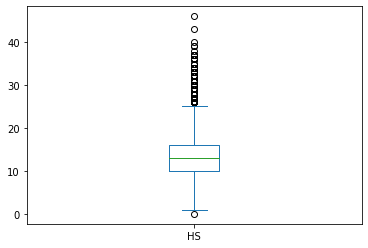

In [54]:
df['HS'].plot.box()

<AxesSubplot:>

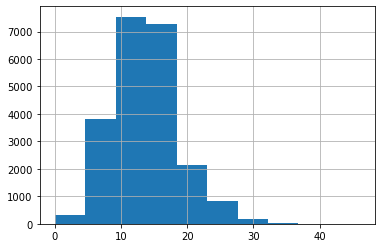

In [55]:
df['HS'].hist()

<AxesSubplot:>

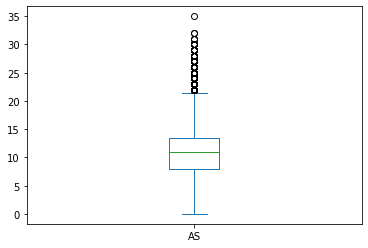

In [56]:
df['AS'].plot.box()

<AxesSubplot:>

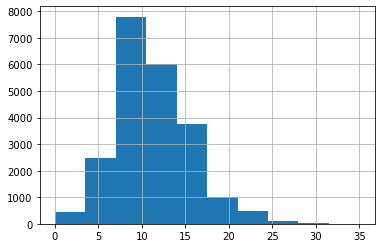

In [57]:
df['AS'].hist()

<AxesSubplot:>

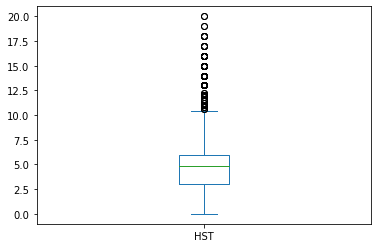

In [58]:
df['HST'].plot.box()

<AxesSubplot:>

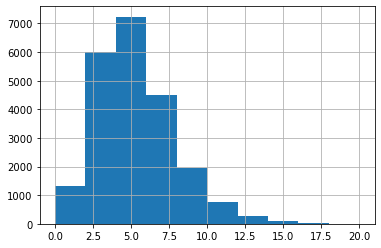

In [59]:
df['HST'].hist()

<AxesSubplot:>

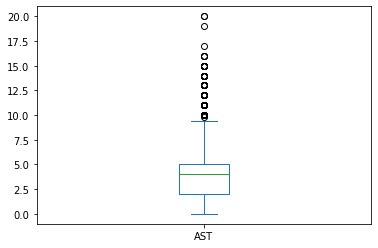

In [60]:
df['AST'].plot.box()

<AxesSubplot:>

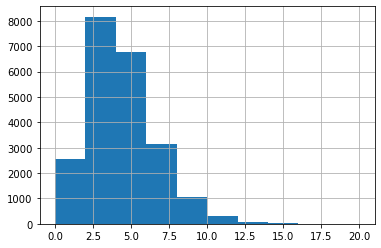

In [61]:
df['AST'].hist()

In [62]:
indexes = tukey_outliers(df, 3, ['HS', 'AS', 'HST', 'AST', 'HF','AF', 'HC', 'AC', 'HY','AY','HR','AR'])

In [63]:
len(indexes)

33

In [64]:
df = df.drop(indexes, axis=0)

* Removendo outliers usando razão de duas variáveis (Bivariado)

In [65]:
# Chutes no Alvo / Chutes na partida (do Time da casa)
df['Precision'] = df['HST'] / df['HS']

<AxesSubplot:>

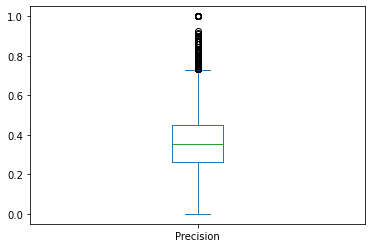

In [66]:
df['Precision'].plot.box()

<AxesSubplot:>

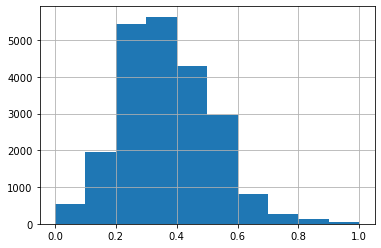

In [67]:
df['Precision'].hist()

In [68]:
indexes = tukey_outliers(df, 1, ['Precision'])

In [69]:
df = df.drop(indexes, axis=0)

* Removendo outliers com Elliptic Envelope (multivariado)


In [70]:
df_t = df.select_dtypes(include=[np.number]).drop('Precision', axis=1)

In [71]:
detector = EllipticEnvelope(contamination=0.1)
detector.fit(df_t)

EllipticEnvelope()

In [72]:
scores = detector.predict(df_t)

In [73]:
len(scores)

22115

In [74]:
df_t['outliers'] = scores

In [75]:
indexes = df_t[df_t['outliers'] == -1].index

In [76]:
df = df.drop(indexes, axis = 0)

### 3. Estatísticas Descritivas

Vamos analisar o número de gols do time mandante e visitante em cada temporada do brasileirão.

In [53]:
df_br = df[df['Div'] == 'Brazil']

df_br_2012 = df_br[df_br['Season'] == 2012]
df_br_2013 = df_br[df_br['Season'] == 2013]
df_br_2014 = df_br[df_br['Season'] == 2014]
df_br_2015 = df_br[df_br['Season'] == 2015]
df_br_2016 = df_br[df_br['Season'] == 2016]
df_br_2017 = df_br[df_br['Season'] == 2017]
df_br_2018 = df_br[df_br['Season'] == 2018]
df_br_2019 = df_br[df_br['Season'] == 2019]
df_br_2020 = df_br[df_br['Season'] == 2020]
df_br_2021 = df_br[df_br['Season'] == 2021]
df_br_2022 = df_br[df_br['Season'] == 2022]

In [54]:
year = []

year.append(2012)
year.append(2013)
year.append(2014)
year.append(2015)
year.append(2016)
year.append(2017)
year.append(2018)
year.append(2019)
year.append(2020)
year.append(2021)
year.append(2022)

In [55]:
ftag_br = []
fthg_br = []

ftag_br.append(df_br_2012['FTAG'].mean())
fthg_br.append(df_br_2012['FTHG'].mean())
ftag_br.append(df_br_2013['FTAG'].mean())
fthg_br.append(df_br_2013['FTHG'].mean())
ftag_br.append(df_br_2014['FTAG'].mean())
fthg_br.append(df_br_2014['FTHG'].mean())
ftag_br.append(df_br_2015['FTAG'].mean())
fthg_br.append(df_br_2015['FTHG'].mean())
ftag_br.append(df_br_2016['FTAG'].mean())
fthg_br.append(df_br_2016['FTHG'].mean())
ftag_br.append(df_br_2017['FTAG'].mean())
fthg_br.append(df_br_2017['FTHG'].mean())
ftag_br.append(df_br_2018['FTAG'].mean())
fthg_br.append(df_br_2018['FTHG'].mean())
ftag_br.append(df_br_2019['FTAG'].mean())
fthg_br.append(df_br_2019['FTHG'].mean())
ftag_br.append(df_br_2020['FTAG'].mean())
fthg_br.append(df_br_2020['FTHG'].mean())
ftag_br.append(df_br_2021['FTAG'].mean())
fthg_br.append(df_br_2021['FTHG'].mean())
ftag_br.append(df_br_2022['FTAG'].mean())
fthg_br.append(df_br_2022['FTHG'].mean())


- Média de gols dos times mandantes por temporada no brasileirão

1.4123840561544247

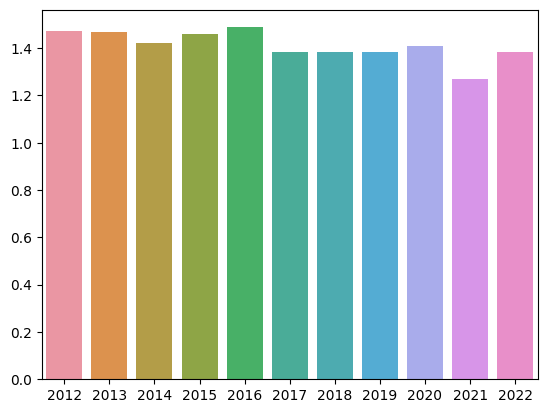

In [56]:
sns.barplot(x=year, y=fthg_br)
df_br['FTHG'].mean()

- Média de gols dos times visitantes por temporada no brasileirão

0.9448483329155176

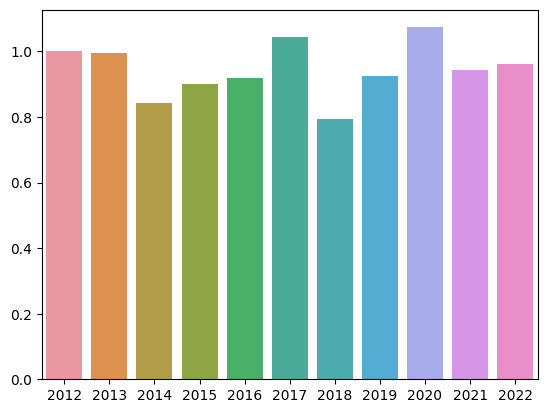

In [57]:
sns.barplot(x=year, y=ftag_br)
df_br['FTAG'].mean()

Vamos analisar a quantidade média de chutes dos times mandantes e visitantes em cada temporada do brasileirão

In [58]:
ast_br = []
hst_br = []

ast_br.append(df_br_2012['AST'].mean())
hst_br.append(df_br_2012['HST'].mean())
ast_br.append(df_br_2013['AST'].mean())
hst_br.append(df_br_2013['HST'].mean())
ast_br.append(df_br_2014['AST'].mean())
hst_br.append(df_br_2014['HST'].mean())
ast_br.append(df_br_2015['AST'].mean())
hst_br.append(df_br_2015['HST'].mean())
ast_br.append(df_br_2016['AST'].mean())
hst_br.append(df_br_2016['HST'].mean())
ast_br.append(df_br_2017['AST'].mean())
hst_br.append(df_br_2017['HST'].mean())
ast_br.append(df_br_2018['AST'].mean())
hst_br.append(df_br_2018['HST'].mean())
ast_br.append(df_br_2019['AST'].mean())
hst_br.append(df_br_2019['HST'].mean())
ast_br.append(df_br_2020['AST'].mean())
hst_br.append(df_br_2020['HST'].mean())
ast_br.append(df_br_2021['AST'].mean())
hst_br.append(df_br_2021['HST'].mean())
ast_br.append(df_br_2022['AST'].mean())
hst_br.append(df_br_2022['HST'].mean())

- Média de chutes a gol do time mandante por temporada no brasileirão

4.84265062226679

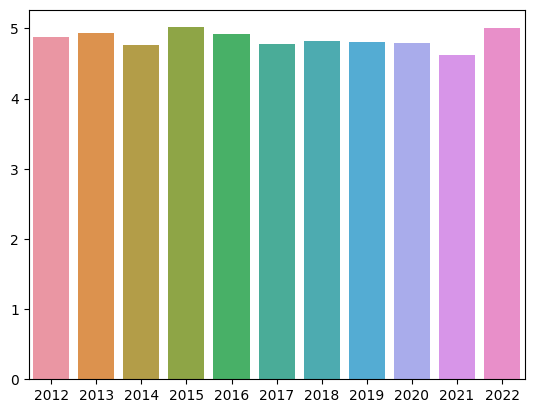

In [59]:
sns.barplot(x=year, y=hst_br)
df_br['HST'].mean()

- Média de chutes a gol do time visitante por temporada no brasileirão

3.7624133025263933

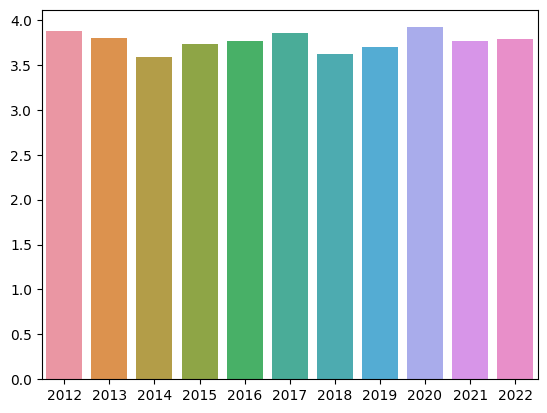

In [60]:
sns.barplot(x=year, y=ast_br)
df_br['AST'].mean()

Vamos analisar o número de vitórias do time mandante e visitante em cada temporada do brasileirão

In [69]:
ftr_home_br = []
ftr_adv_br = []

ftr_home_br.append(df_br_2012['FTR'].value_counts().loc['H'] / df_br_2012.shape[0])
ftr_home_br.append(df_br_2013['FTR'].value_counts().loc['H'] / df_br_2013.shape[0])
ftr_home_br.append(df_br_2014['FTR'].value_counts().loc['H'] / df_br_2014.shape[0])
ftr_home_br.append(df_br_2015['FTR'].value_counts().loc['H'] / df_br_2015.shape[0])
ftr_home_br.append(df_br_2016['FTR'].value_counts().loc['H'] / df_br_2016.shape[0])
ftr_home_br.append(df_br_2017['FTR'].value_counts().loc['H'] / df_br_2017.shape[0])
ftr_home_br.append(df_br_2018['FTR'].value_counts().loc['H'] / df_br_2018.shape[0])
ftr_home_br.append(df_br_2019['FTR'].value_counts().loc['H'] / df_br_2019.shape[0])
ftr_home_br.append(df_br_2020['FTR'].value_counts().loc['H'] / df_br_2020.shape[0])
ftr_home_br.append(df_br_2021['FTR'].value_counts().loc['H'] / df_br_2021.shape[0])
ftr_home_br.append(df_br_2022['FTR'].value_counts().loc['H'] / df_br_2022.shape[0])

ftr_adv_br.append(df_br_2012['FTR'].value_counts().loc['A'] / df_br_2012.shape[0])
ftr_adv_br.append(df_br_2013['FTR'].value_counts().loc['A'] / df_br_2013.shape[0])
ftr_adv_br.append(df_br_2014['FTR'].value_counts().loc['A'] / df_br_2014.shape[0])
ftr_adv_br.append(df_br_2015['FTR'].value_counts().loc['A'] / df_br_2015.shape[0])
ftr_adv_br.append(df_br_2016['FTR'].value_counts().loc['A'] / df_br_2016.shape[0])
ftr_adv_br.append(df_br_2017['FTR'].value_counts().loc['A'] / df_br_2017.shape[0])
ftr_adv_br.append(df_br_2018['FTR'].value_counts().loc['A'] / df_br_2018.shape[0])
ftr_adv_br.append(df_br_2019['FTR'].value_counts().loc['A'] / df_br_2019.shape[0])
ftr_adv_br.append(df_br_2020['FTR'].value_counts().loc['A'] / df_br_2020.shape[0])
ftr_adv_br.append(df_br_2021['FTR'].value_counts().loc['A'] / df_br_2021.shape[0])
ftr_adv_br.append(df_br_2022['FTR'].value_counts().loc['A'] / df_br_2022.shape[0])

- Média de vitórias dos times mandantes por temporada no brasileirão

0.48809225369766857

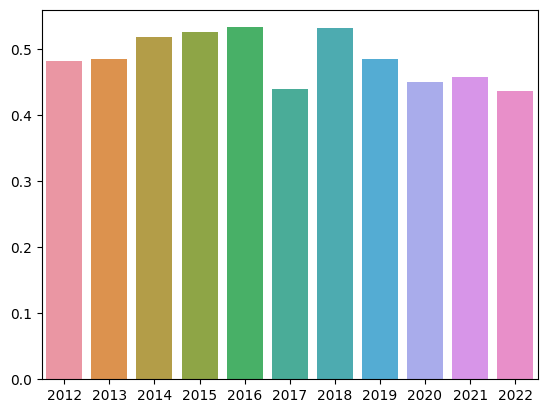

In [72]:
sns.barplot(x=year, y=ftr_home_br)
df_br['FTR'].value_counts().loc['H'] / df_br.shape[0]

- Média de vitórias dos times visitantes por temporada no brasileirão

0.2411631987966909

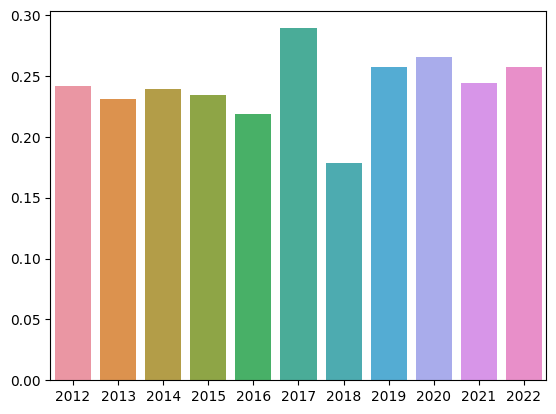

In [73]:
sns.barplot(x=year, y=ftr_adv_br)
df_br['FTR'].value_counts().loc['A'] / df_br.shape[0]

# 4. Teste de Hipóteses

Hipótese Nula: Os times têm a mesma precisão no chute em diferentes temporadas.

Hipótese Alternativa: Os times não têm a mesma precisão no chute em diferentes temporadas.

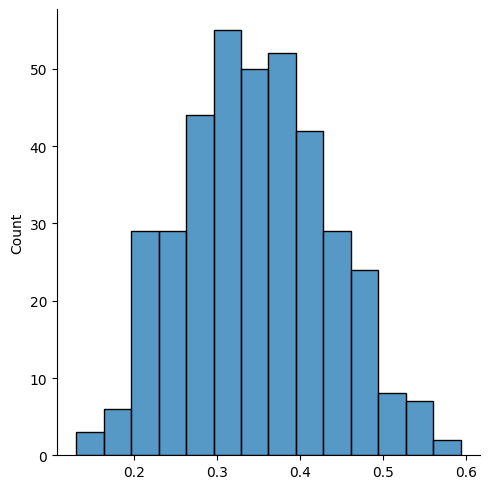

In [110]:
sns.displot(df_br_2012['HST'] / df_br_2012['HS'])

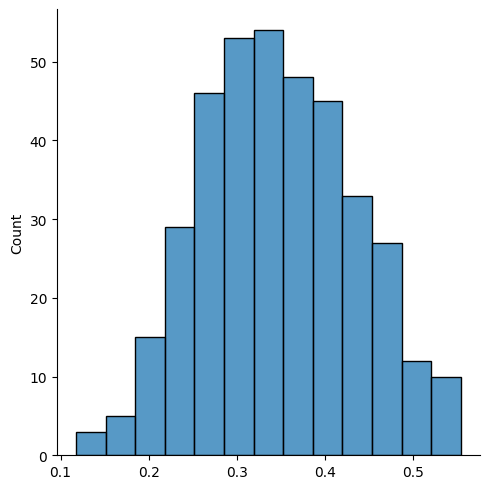

In [111]:
sns.displot(df_br_2021['HST'] / df_br_2021['HS'])

<AxesSubplot:ylabel='Density'>

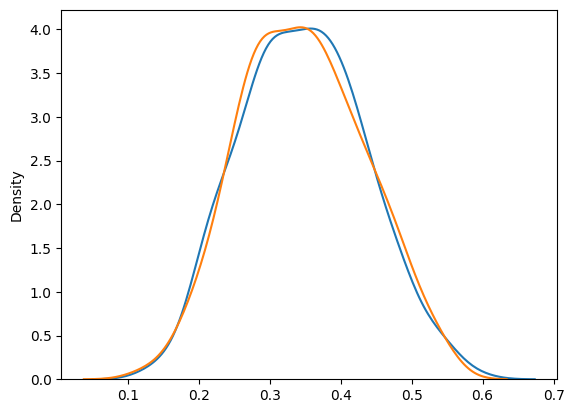

In [115]:
sns.kdeplot(df_br_2012['HST'] / df_br_2012['HS'])
sns.kdeplot(df_br_2021['HST'] / df_br_2021['HS'])

<AxesSubplot:>

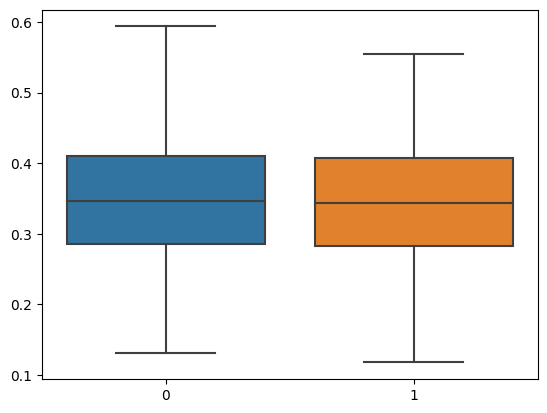

In [121]:
data = pd.concat([df_br_2012['HST'] / df_br_2012['HS'], df_br_2021['HST'] / df_br_2021['HS']], axis=1)
sns.boxplot(data=data)

In [139]:
pared_test = (df_br_2021['HST'] / df_br_2021['HS']).subtract(df_br_2012['HST'] / df_br_2012['HS'], fill_value=0)

A diferença não é gaussiana, isso foi verificado ao realizar o teste Shapiro

In [138]:

stats.shapiro(pared_test)

ShapiroResult(statistic=0.8393424153327942, pvalue=5.327142641032505e-27)

A partir do wilcoxon podemos afirmar que ambos os dados seguem a mesma distribuição

In [143]:
stats.wilcoxon(pared_test)

WilcoxonResult(statistic=144144.5, pvalue=0.941340440127076)

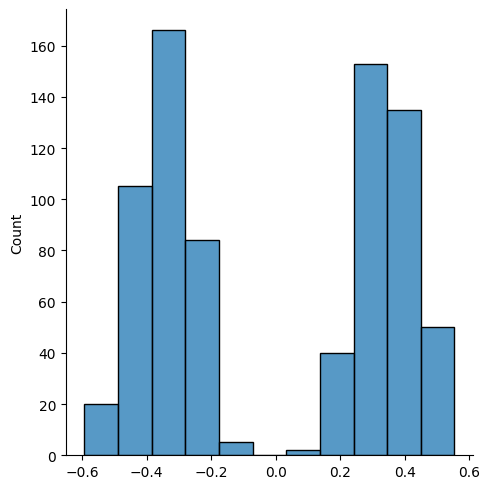

In [142]:
sns.displot(pared_test)